In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Data Reshape

In [ ]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

**Data Normalization**

In [ ]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

**Splitting the data**

In [ ]:
X_valid ,X_train = X_train_n[:5000], X_train_n[5000:]
y_valid ,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters= 32, kernel_size = (3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

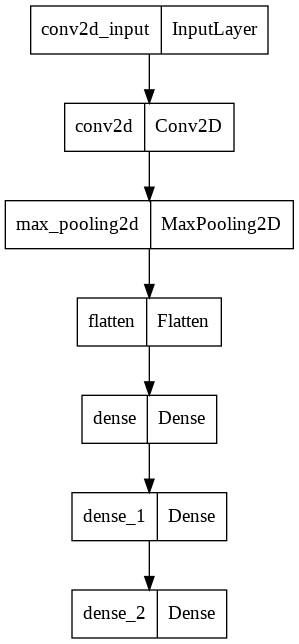

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics =["accuracy"])

In [ ]:
model_history = model.fit(X_train,y_train , epochs=50, batch_size=64, 
                          validation_data=(X_valid,y_valid))

Epoch 1/50
860/860 [==============================] - 38s 44ms/step - loss: 0.8766 - accuracy: 0.6988 - val_loss: 0.7540 - val_accuracy: 0.7332
Epoch 2/50
860/860 [==============================] - 37s 43ms/step - loss: 0.5386 - accuracy: 0.8046 - val_loss: 0.4903 - val_accuracy: 0.8212
Epoch 3/50
860/860 [==============================] - 37s 43ms/step - loss: 0.4810 - accuracy: 0.8261 - val_loss: 0.9134 - val_accuracy: 0.7126
Epoch 4/50
860/860 [==============================] - 37s 43ms/step - loss: 0.4440 - accuracy: 0.8413 - val_loss: 0.4157 - val_accuracy: 0.8566
Epoch 5/50
860/860 [==============================] - 37s 43ms/step - loss: 0.4201 - accuracy: 0.8500 - val_loss: 0.4358 - val_accuracy: 0.8478
Epoch 6/50
860/860 [==============================] - 37s 43ms/step - loss: 0.3956 - accuracy: 0.8582 - val_loss: 0.3753 - val_accuracy: 0.8712
Epoch 7/50
860/860 [==============================] - 37s 44ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 0.4065 - val_accuracy:

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
model.evaluate(X_test, y_test)